In [1]:
import ketos.data_handling.database_interface as dbi
import matplotlib.pyplot as plt
import numpy as np

import panel as pn
from panel.interact import interact, fixed
import hvplot.pandas
import holoviews as hv
from panel import widgets
pn.extension()
hv.extension('bokeh')

In [2]:
def plot_spectrogram(data,class_idx,label,idx):
    
    spectro = data[class_idx[idx]]["data"]
    label = data[class_idx[idx]]["label"]   
    fig, ax = plt.subplots()  # a figure with a single Axes
    ax.imshow(spectro.T)
    ax.set_title(label)
    ax.invert_yaxis()
    return ax.figure

In [9]:
#db_file = r"G:\NOAA\2022_BC_fish_detector\ketos\dataset_20230206T120453\databases\spectro-0.2s_fft-0.064_step-0.01_fmin-0_fmax-1200_no-norm_denoised_40000perclass\database.h5"
#db_file = r"G:\NOAA\2022_BC_fish_detector\ketos\dataset_20230206T120453\databases\spectro-0.2s_fft-0.064_step-0.01_fmin-0_fmax-1200_no-norm_denoised_10000perclass\database.h5"
db_file = r"G:\NOAA\2022_BC_fish_detector\ketos\dataset_20230206T120453\databases\spectro-0.2s_fft-0.064_step-0.01_fmin-0_fmax-1200_no-norm_denoised_fulldataset\database.h5"

In [11]:
db = dbi.open_file(db_file, "r")
train_data = dbi.open_table(db, "/train/data")
val_data = dbi.open_table(db, "/test/data")
train_labels = train_data[:]["label"]
#val_labels = val_data[:]["label"]

In [12]:
len(train_data)

219555

In [13]:
 train_data[0]["data"].shape

(20, 78)

## Training data

In [14]:
hv.Curve(train_labels).opts(tools=["hover"])

:Curve   [x]   (y)

Column
    [0] Column
        [0] IntSlider(end=21094, value=1, width=900)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00989')
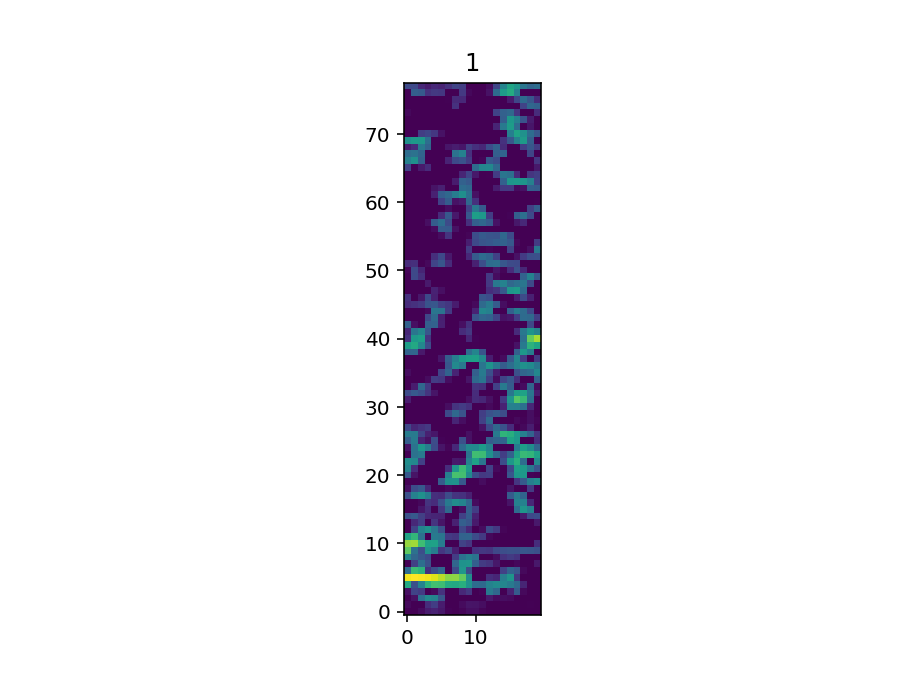

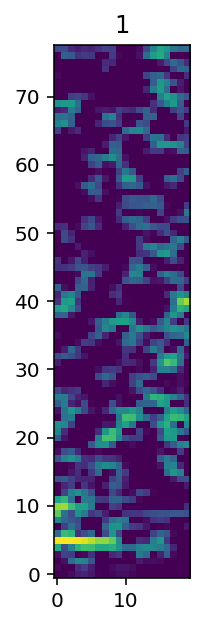

In [15]:
target_label = 1

class_idx = np.where(train_labels == target_label)[0]
interact(plot_spectrogram, data=fixed(train_data),class_idx=fixed(class_idx), label=fixed(train_labels), idx=widgets.IntSlider(start=0,end=len(class_idx),step=1,value=1,width=900),throttled=False)

In [ ]:
idx = 1614
spectro = train_data[class_idx[idx]]["data"]
label = train_data[class_idx[idx]]["label"]   
fig, ax = plt.subplots()  # a figure with a single Axes
ax.imshow(spectro.T)
ax.set_title(label)
ax.invert_yaxis()

## Test data

In [ ]:
hv.Curve(val_labels).opts(tools=["hover"])

In [ ]:
target_label = 1

class_idx = np.where(val_labels == target_label)[0]
interact(plot_spectrogram, data=fixed(val_data),class_idx=fixed(class_idx), label=fixed(val_labels), idx=widgets.IntSlider(start=0,end=len(class_idx),step=1,value=0,width=900),throttled=False)

In [ ]:
plot_spectrogram(data,1,label,idx):